# Naive Bayes Algorithm 

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

# How to build a basic model using Naive Bayes in Python?

Again, scikit learn (python library) will help here to build a Naive Bayes model in Python. There are three types of Naive Bayes model under scikit learn library:

    Gaussian: It is used in classification and it assumes that features follow a normal distribution.

    Multinomial: It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

    Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

Based on your data set, you can choose any of above discussed model.

# Gaussian model

In [1]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

#assigning predictor and target variables
x= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
Y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

In [2]:
x

array([[-3,  7],
       [ 1,  5],
       [ 1,  2],
       [-2,  0],
       [ 2,  3],
       [-4,  0],
       [-1,  1],
       [ 1,  1],
       [-2,  2],
       [ 2,  7],
       [-4,  1],
       [-2,  7]])

In [3]:
Y

array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

In [10]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(x, Y)

#Predict Output 
output= model.predict([[1,5],[1,2],[2,7]])
print(output)

[4 3 4]


In [11]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
# Train the model using the training sets 
model.fit(x, Y)
#Predict Output 
output= model.predict([[1,5],[1,2],[2,7]])
print(output)

[4 4 4]


# Navie Bayes Classification -Diabetes Dataset 

In [12]:
import pandas as pd


In [13]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data=pd.read_csv('/home/govinth/Documents/data/pima-indians-diabetes-database/diabetes.csv',header=None,names=col_names)

In [14]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6443cb5c18>,
      dtype=object)

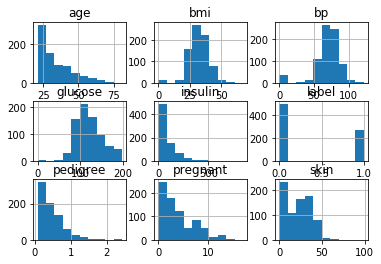

In [27]:
data.hist()

In [15]:
feature_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
x=data[feature_names]
y=data['label']

In [17]:
x.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [42]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [43]:
model=GaussianNB()

In [44]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
predicted=model.predict([[0,137,40,35,168,43.1,2.288,33]])
print(predicted)

[1]


# GaussianNB-Training & Testing

In [46]:
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [47]:
import numpy as np
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(RMSE)

[[114  16]
 [ 29  33]]
0.4841229182759271


In [48]:
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100))
print("Precision:",(metrics.precision_score(y_test, y_pred)*100))
print("Recall:",(metrics.recall_score(y_test, y_pred)*100))

Accuracy: 76.5625
Precision: 67.3469387755102
Recall: 53.2258064516129


# BernoulliNB-Training & Testing

In [49]:
model1=BernoulliNB()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)


In [50]:
predicted=model1.predict([[0,137,40,35,168,43.1,2.288,33]])
print(predicted)


[0]


In [51]:
# import the metrics class
import numpy as np
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(cnf_matrix)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
print(RMSE*100)

[[129   1]
 [ 62   0]]
57.282196186948


In [52]:
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred1)*100))
print("Precision:",(metrics.precision_score(y_test, y_pred1)*100))
print("Recall:",(metrics.recall_score(y_test, y_pred1)*100))

Accuracy: 67.1875
Precision: 0.0
Recall: 0.0


# MultinomialNB - Trainning & Testing

In [40]:
model2=MultinomialNB()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)


In [41]:
# import the metrics class
import numpy as np
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)
print(cnf_matrix)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
print(RMSE*100)

[[93 37]
 [39 23]]
62.915286960589576


In [53]:
predicted=model.predict([[0],[1],[85],[66],[29],[0],[26.6],[31]])

In [54]:
print(predicted)

[0 0 1 1 1 0 1 1]


# Iris Dataset-Try out all Navie bayes model

In [55]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d" % (iris.data.shape[0],(iris.target != y_pred).sum()))
#Number of mislabeled points out of a total 150 points : 6

Number of mislabeled points out of a total 150 points : 6


In [56]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])